In [1]:
#Create Dataframe

import pandas as pd
df = pd.read_excel("~/Desktop/Research/LMU_Wellness/data/Wellness_Database_May19.xlsx", sheet_name="Wellness Responses")

sore_areas = ["Neck", "Back", "Shoulders", "Chest", "Arms", "Hip Flexors", "Glutes", "Hamstrings", "Quadricps", "Adductors", "Calves", "Feet"]
for area in sore_areas:
    df[area] = df["Select where you are sore:"].str.contains(area, na=False).astype(int)

# Drop the original "Select where you are sore:" column
df = df.drop("Select where you are sore:", axis=1)

columns_to_drop = ['Athlete Name','Timestamp', 'Athlete ID #', 'Data ID', 'Week ID', 'Week ID Refined', 'Date Value', 'Year ID', 'Season ID', 'Injury Refined', 'Position', 'Classification', 'Stress RA', 'Stress StdDev', 'Stress Z-Score', 'Stress Wellness Score', 'Sleep Quality RA', 'Sleep Quality StdDev', 'Sleep Quality Z-Score', 'Sleep Quality Wellness Score', 'Sleep Quantity RA', 'Sleep Quantity StdDev', 'Sleep Quantity Z-Score', 'Sleep Quantity Wellness Score', 'Soreness RA', 'Soreness StdDev', 'Soreness Z-Score', 'Soreness Wellness Score', 'Hydrate RA', 'Hydrate StdDev', 'Hydrate Z-Score', 'Hydrate Wellness Score', 'Fuel RA', 'Fuel StdDev', 'Fuel Z-Score', 'Fuel Wellness Score', 'Readiness Score']
df = df.drop(columns_to_drop, axis=1)

df['No Injury'] = (df['What is your injury status?'] == 'Full = I have no injury').astype(int)
df['Some Injury'] = (df['What is your injury status?'] == 'Limited = I need a modification during lift / practice').astype(int)
df['Injury'] = (df['What is your injury status?'] == 'Out = I have an injury').astype(int)

# Drop the original column
df = df.drop('What is your injury status?', axis=1)

df = df.dropna(subset=["How well did you hydrate?"])

In [ ]:
## CORRELATION ANALYSIS

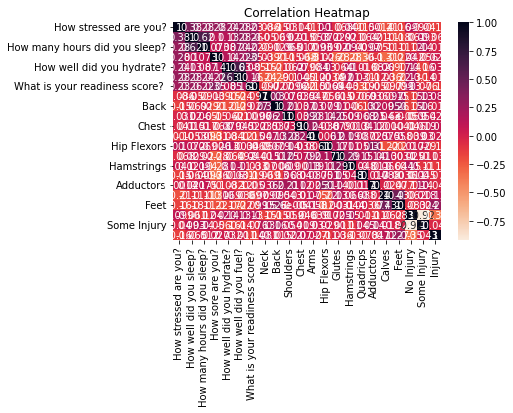

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = plt.axes()
sns.heatmap(df.corr(), annot = True, cmap = 'rocket_r', ax = ax);
ax.set_title('Correlation Heatmap')

plt.savefig("heatmap.png")
plt.show()

In [31]:
correlation_matrix = df.corr()

high_correlations = []
index = 0
for column in correlation_matrix:
    for i in range(len(correlation_matrix)):
        if (abs(correlation_matrix[column][i]) >= .30) and (i != index):
            if [correlation_matrix.columns[i], column, correlation_matrix[column][i]] in high_correlations:
                continue
            else:
                data = [column, correlation_matrix.columns[i], correlation_matrix[column][i]]
                high_correlations.append(data)
    index += 1

In [32]:
high_correlations

[['How stressed are you?', 'How well did you sleep?', 0.3831670143002811],
 ['How well did you sleep?',
  'How many hours did you sleep?',
  0.622286328275322],
 ['How sore are you?', 'What is your readiness score? ', 0.34713879912766143],
 ['How sore are you?', 'Arms', -0.309421767597443],
 ['How sore are you?', 'Quadricps', -0.35656475019836614],
 ['How sore are you?', 'Calves', -0.31315340945029735],
 ['How well did you hydrate?', 'How well did you fuel?', 0.6305093983720677],
 ['Hip Flexors', 'Adductors', 0.3133700880261777],
 ['Calves', 'Feet', 0.43241311486193007],
 ['No Injury', 'Some Injury', -0.9186662990258192],
 ['No Injury', 'Injury', -0.35495560366037465]]

In [47]:
for i in range(len(correlation_matrix)):
    if(abs(correlation_matrix["What is your readiness score? "][i]) >= .3) and not (correlation_matrix.columns[i] == "What is your readiness score? "):
        print("----------SIGNIFICANT PREDICTOR----------")
    if(correlation_matrix.columns[i] == "What is your readiness score? "):
        continue
    print("What is your readiness score &", correlation_matrix.columns[i]+":")
    print(correlation_matrix["What is your readiness score? "][i])
    if(abs(correlation_matrix["What is your readiness score? "][i]) >= .3):
        print("-----------------------------------------")
    print('\n')

What is your readiness score & How stressed are you?:
0.22998714566749726


What is your readiness score & How well did you sleep?:
0.25790403799634337


What is your readiness score & How many hours did you sleep?:
0.21990042331703188


----------SIGNIFICANT PREDICTOR----------
What is your readiness score & How sore are you?:
0.34713879912766143
-----------------------------------------


What is your readiness score & How well did you hydrate?:
0.08523309032565428


What is your readiness score & How well did you fuel?:
0.16145023660958382


What is your readiness score & Neck:
-0.09684908010660674


What is your readiness score & Back:
-0.02719517287854233


What is your readiness score & Shoulders:
-0.009567372427621032


What is your readiness score & Chest:
0.021694872003392977


What is your readiness score & Arms:
-0.1473096860627694


What is your readiness score & Hip Flexors:
-0.006879916780281005


What is your readiness score & Glutes:
0.04448051797703549


What is your r

In [ ]:
## VIF ANALYSIS

In [ ]:
#TO DO